### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
# type your code here
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**Load the adults income dataset and print first five observations**

In [2]:
ad_i=pd.read_csv("adult_income.csv")
ad_i.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
ad_i.dtypes
ad_i['sex'].replace({0:'Male',1:"Female"}, inplace=True)
print(ad_i['sex'])

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
32556      Male
32557    Female
32558      Male
32559    Female
32560      Male
Name: sex, Length: 32561, dtype: object


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
ad_i.groupby('sex', as_index=False).age.mean()

,sex,age
0,Female,36.858230
1,Male,39.433547


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
ad_i95=ad_i['capital.gain'].quantile(0.95)
ad_i95

5013.0

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
ad_i_mode = ad_i['education'].mode()
ad_i_mode

0    HS-grad
dtype: object

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
ad_i.groupby('workclass', as_index=False).age.median()

,workclass,age
0,?,35
1,Federal-gov,43
2,Local-gov,41
3,Never-worked,18
4,Private,35
5,Self-emp-inc,45
6,Self-emp-not-inc,44
7,State-gov,39
8,Without-pay,57


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
ad_i_mean=ad_i["capital.gain"].mean()
ad_i_trim_mean=stats.trim_mean(ad_i['capital.gain'],proportiontocut=0.01)
print("Mean:",ad_i_mean,'|',"Trim Mean:",ad_i_trim_mean)

Mean: 1077.6488437087312 | Trim Mean: 493.7085331077058


- Outliers affecting the dataset and observations by a lot and needs to be treated.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
print((ad_i['race']).value_counts(normalize=True)*100)
print("The percentage of the Asian-Pac-Islander race people is",((ad_i['race']=='Asian-Pac-Islander').sum()/ad_i['race'].count())*100,"%")

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64
The percentage of the Asian-Pac-Islander race people is 3.190933939375326 %


In [10]:
ad_i.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
print('The occupation which has more variability in the working hours is',ad_i.groupby('occupation')['hours.per.week'].var().idxmax())

The occupation which has more variability in the working hours is Farming-fishing


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
ad_i_hpw_q1=ad_i['hours.per.week'].quantile(.25)
ad_i_hpw_q3=ad_i['hours.per.week'].quantile(.75)
ad_i_iqr = ad_i_hpw_q3-ad_i_hpw_q1
print('Range of Middle 50% of working hours per week is',ad_i_iqr)

Range of Middle 50% of working hours per week is 5.0


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
ad_i.var()
## fnlwgt can be excluded

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.527370e+02
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
(ad_i.groupby('workclass')['hours.per.week'].std()/ad_i.groupby('workclass')['hours.per.week'].mean())*100

workclass
?                   46.711116
Federal-gov         21.360037
Local-gov           26.283120
Never-worked              NaN
Private             27.954085
Self-emp-inc        28.473900
Self-emp-not-inc    37.537713
State-gov           29.968071
Without-pay         53.059084
Name: hours.per.week, dtype: float64

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
def plot_graph(col):
    plt.bar(col.value_counts().index,col.value_counts().values)
    plt.show()
    print(col.value_counts().nlargest(1))

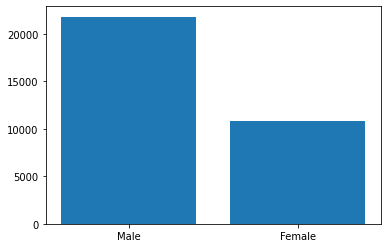

Male    21790
Name: sex, dtype: int64


In [16]:
plot_graph(ad_i['sex'])

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

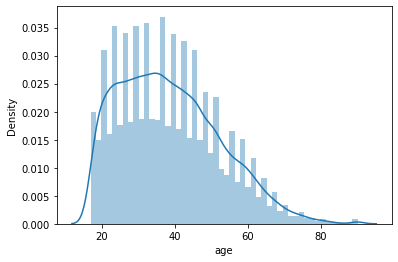

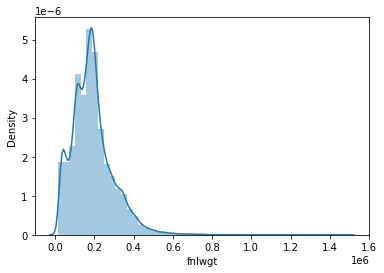

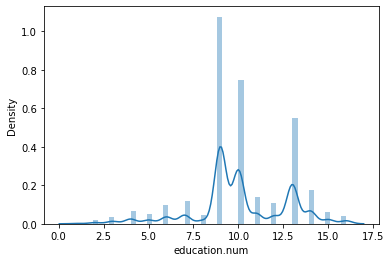

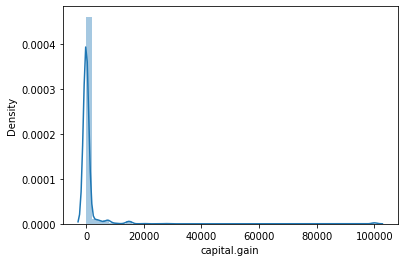

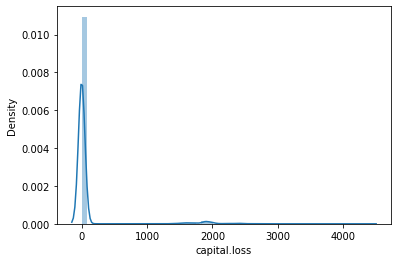

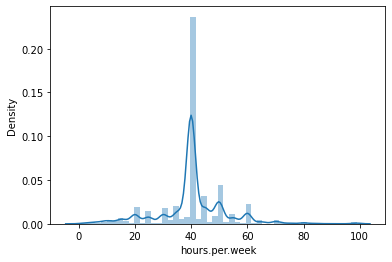

In [17]:
ad_64 = ad_i.select_dtypes(exclude=['object'])
for column in ad_64.columns:
    plt.figure()
    sns.distplot(ad_64[column])

- As we can see only 'hours.per.week' is normally distributed.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
b = ad_i['workclass'].value_counts().nlargest(1)
print("The working class and their frequency for the most population is",b)

The working class and their frequency for the most population is Private    22696
Name: workclass, dtype: int64


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
ad_i['hours.per.week'].value_counts().nlargest(5)

40    15214
50     2819
45     1824
60     1475
35     1296
Name: hours.per.week, dtype: int64

<a id="sk"> </a>
## 5. Skewness and Kurtosis

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

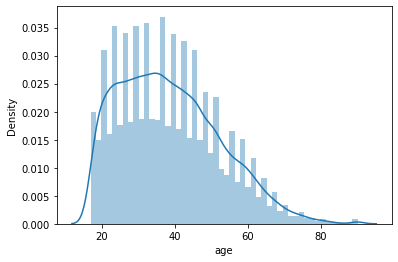

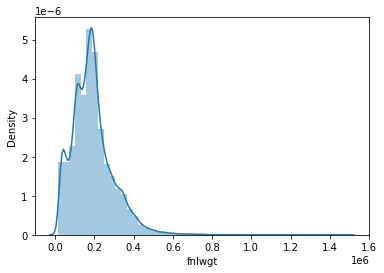

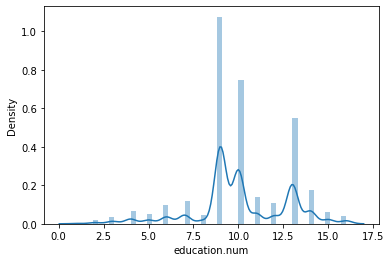

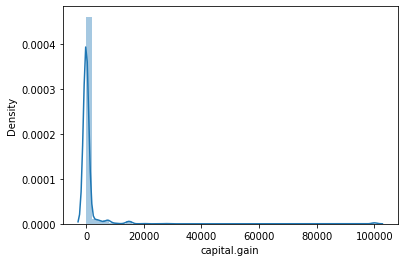

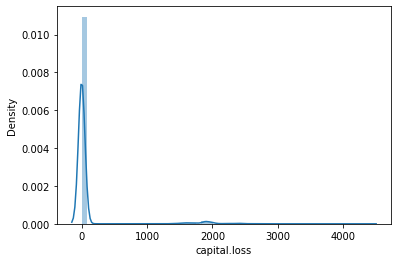

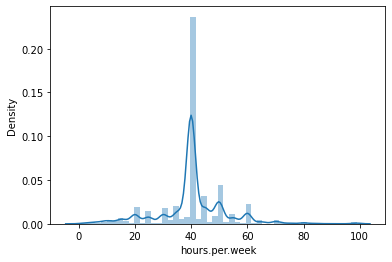

In [20]:
ad_skew=ad_i.skew()
print(ad_skew)
for column in ad_64.columns:
    plt.figure()
    sns.distplot(ad_64[column])

- education.num is negatively skewed.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
ad_i.kurt()

age                -0.166127
fnlwgt              6.218811
education.num       0.623444
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916782
dtype: float64

- age, hours.per.week is mesokurtic as the distribution is close to normal distribution.
- fnlwgt, education.num, capital.gain and capital.loss is leptokurtic as we can see excess kurtosis.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


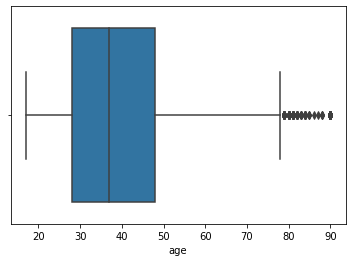

In [22]:
sns.boxplot(ad_i['age'])

- As we can see we are looking at the outliers begining to form near 78 years of age.

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

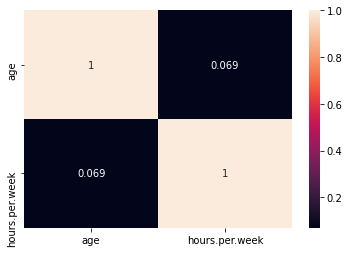

In [23]:
sns.heatmap(ad_i[['age','hours.per.week']].corr(),annot=True)

- No, we can see that the correlation is very weak.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

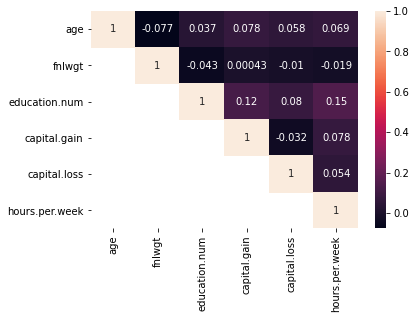

In [24]:
corr_ad_i=ad_i.corr()
mask = np.tril(np.ones_like(corr_ad_i,dtype=bool),k=-1)
sns.heatmap(corr_ad_i,mask=mask,annot=True)